## Tensorflow Probability Installation

In [1]:
#@title Tensorflow Probability Installation (make sure to run this cell)  { display-mode: "form" }
TFP_Installation = "Stable TFP" #@param ["Most Recent TFP", "Stable TFP", "Stable TFP-GPU", "Most Recent TFP-GPU", "TFP Already Installed"]

if TFP_Installation == "Most Recent TFP":
    !pip3 install -q tfp-nightly
    print("Most recent TFP version installed")
elif TFP_Installation == "Stable TFP":
    !pip3 install -q --upgrade tensorflow-probability
    print("Up-to-date, stable  TFP version installed")
elif TFP_Installation == "Stable TFP-GPU":
    !pip3 install -q --upgrade tensorflow-probability-gpu
    print("Up-to-date, stable TFP-GPU version installed")
    print("(make sure GPU is properly configured)")
elif TFP_Installation == "Most Recent TFP-GPU":
    !pip3 install -q tfp-nightly-gpu
    print("Most recent TFP-GPU version installed")
    print("(make sure GPU is properly configured)")
elif TFP_Installation == "TFP Already Installed":
    print("TFP already instaled in this environment")
    pass
else:
    print("Installation Error: Please select a viable TFP installation option.")
!pip3 install -q corner seaborn

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Up-to-date, stable  TFP version installed
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Install Other Packages

In [2]:
#@title Imports and Global Variables (make sure to run this cell)  { display-mode: "form" }
from __future__ import absolute_import, division, print_function

warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import math
import matplotlib 
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import pandas as pd
import matplotlib.axes as axes;
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
font = {'family' : 'Dejavu Sans','size'   : 20}
matplotlib.rc('font', **font)
from matplotlib.pyplot import cm

import random
import math

import tensorflow as tf
tfe = tf.contrib.eager

# Eager Execution
use_tf_eager = False #@param {type:"boolean"}

# Use try/except so we can easily re-execute the whole notebook.
if use_tf_eager:
  try:
    tf.enable_eager_execution()
  except:
    reset_session()

import tensorflow_probability as tfp
tfd = tfp.distributions

def default_session_options(enable_gpu_ram_resizing=True,
                            enable_xla=False):
  """Creates default options for Graph-mode session."""
  config = tf.ConfigProto()
  config.log_device_placement = True
  if enable_gpu_ram_resizing:
    # `allow_growth=True` makes it possible to connect multiple
    # colabs to your GPU. Otherwise the colab malloc's all GPU ram.
    config.gpu_options.allow_growth = True
  if enable_xla:
    # Enable on XLA. https://www.tensorflow.org/performance/xla/.
    config.graph_options.optimizer_options.global_jit_level = (
        tf.OptimizerOptions.ON_1)
  return config

def session_options(enable_gpu_ram_resizing=True, enable_xla=True):
    """
    Allowing the notebook to make use of GPUs if they're available.
    
    XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear 
    algebra that optimizes TensorFlow computations.
    """
    config = tf.ConfigProto()
    config.log_device_placement = True
    if enable_gpu_ram_resizing:
        # `allow_growth=True` makes it possible to connect multiple colabs to your
        # GPU. Otherwise the colab malloc's all GPU ram.
        config.gpu_options.allow_growth = True
    if enable_xla:
        # Enable on XLA. https://www.tensorflow.org/performance/xla/.
        config.graph_options.optimizer_options.global_jit_level = (
            tf.OptimizerOptions.ON_1)
    return config

def reset_session(options=None):
  """Creates a new global, interactive session in Graph-mode."""
  if tf.executing_eagerly():
    return
  global sess
  try:
    tf.reset_default_graph()
    sess.close()
  except:
    pass
  if options is None:
    options = default_session_options()
  sess = tf.InteractiveSession(config=options)


def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
        `namedtuple` or combinations thereof.

    Returns:
        ndarrays: Object with same structure as `tensors` except with `Tensor` or
          `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    if tf.executing_eagerly():
        return tf.contrib.framework.nest.pack_sequence_as(
            tensors,
            [t.numpy() if tf.contrib.framework.is_tensor(t) else t
             for t in tf.contrib.framework.nest.flatten(tensors)])
    return sess.run(tensors)
  
def reset_sess(config=None):
    """
    Convenience function to create the TF graph & session or reset them.
    """
    if config is None:
        config = session_options()
    global sess
    tf.reset_default_graph()
    try:
        sess.close()
    except:
        pass
    sess = tf.InteractiveSession(config=config)

reset_sess()


class _TFColor(object):
  """Enum of colors used in TF docs."""
  red = '#F15854'
  blue = '#5DA5DA'
  orange = '#FAA43A'
  green = '#60BD68'
  pink = '#F17CB0'
  brown = '#B2912F'
  purple = '#B276B2'
  yellow = '#DECF3F'
  gray = '#4D4D4D'
  magenta =  '#8B008B'
  def __getitem__(self, i):
    return [
        self.red,
        self.orange,
        self.green,
        self.blue,
        self.pink,
        self.brown,
        self.purple,
        self.yellow,
        self.gray,
        self.magenta
    ][i % 10]
TFColor = _TFColor()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

font = {'family' : 'Dejavu Sans','size'   : 20}
matplotlib.rc('font', **font)
rand_seed = 1

## Battery Health Monitoring

Battery storage has become critical for various applications, ranging from renewables to electric vehicles. Lithium ion batteries, in particular, are widely used because of their high power and energy densities. The modeling of these devices is very crucial to accurately predict the state of charge (SoC) and state of health (SoH). As a battery ages, its performance deteriorates in a non-linear manner. Significant research has been undertaken to understand the phenomenon of battery degradation and to develop models for predicting battery life. For more details on the causes of battery degradation and the associated modeling, one may refer to literature. Cell potential (voltage) and capacity (usually stated in ampere-hours) are two primary metrics of interest in a lithium-ion battery. The chart below depicts the time-profile of cell potential, in a discharge cycle, as a function of current draw. With increase in discharge current, the cell potential decreases accordingly.

In [4]:
# Inputs: current, charge and state of degradation (delta)
# Output: voltage 
def calcVoltage(current, charge, delta):
    a = 4 - 0.25 * (1 + delta) * current
    b = 6000 - 250 * (1 + 2*delta) * current
    if(charge < b):
        calcValue = a - 0.0005*charge + np.log(b - charge)
    else:
        calcValue = 0
    return calcValue


# Generate Discharge Profile with variable time steps
# Variable time step to respect a voltage drop (since we have very little points in the fall off region)
def calcTrace_constAmpCycle_varTS(current, delta, dTmax = 1.0, dVmax = 0.01):
    tList = []
    AsList = []
    AList = []
    VList = []
    cur_t = 0
    cur_As = 0
    dV_dT = dVmax/dTmax
    cur_V = calcVoltage(current, 0, delta)
    itercount = 0
    while(cur_V > 0):
        tList.append(cur_t)
        AsList.append(cur_As)
        VList.append(cur_V)
        AList.append(current)
        
        # Calculate Time step for next jump
        dT_step = dTmax
        dT_step_from_dV = dVmax/dV_dT
        if(dT_step_from_dV < dT_step):
            dT_step = dT_step_from_dV

        cur_t += dT_step
        cur_As += current*dT_step
        prev_V = cur_V
        cur_V = calcVoltage(current, cur_As, delta)
        dV_dT = math.fabs(cur_V - prev_V) * 1.0/dT_step
        itercount += 1
    
    # Assemble into a dict
    retDict = {}
    retDict['tList'] = tList
    retDict['AsList'] = AsList
    retDict['AList'] = AList
    retDict['VList'] = VList
    return retDict

## Pristine Battery Response

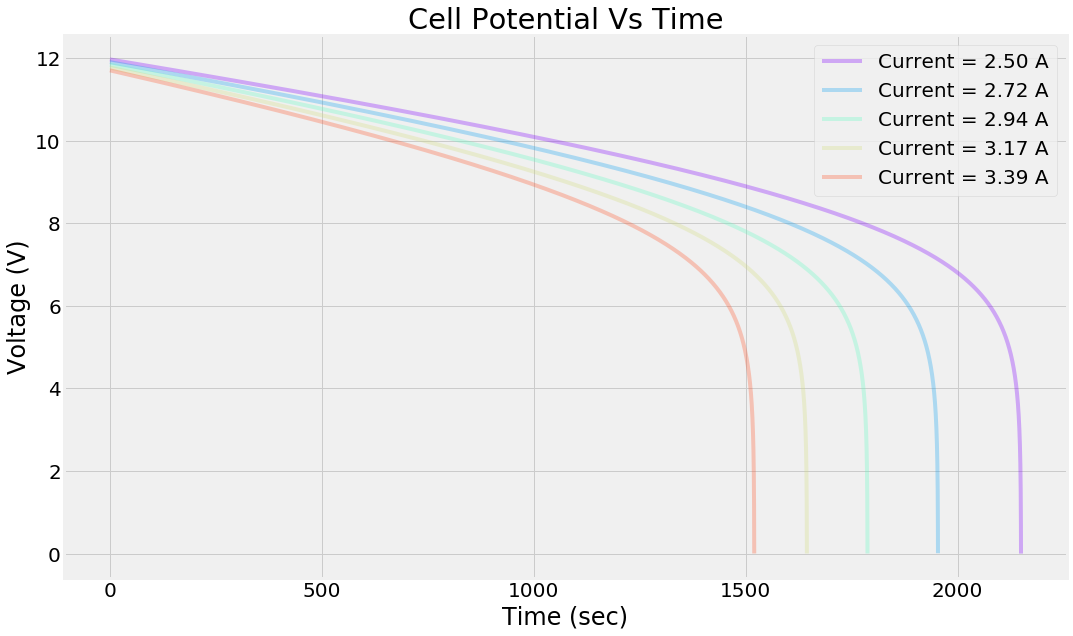

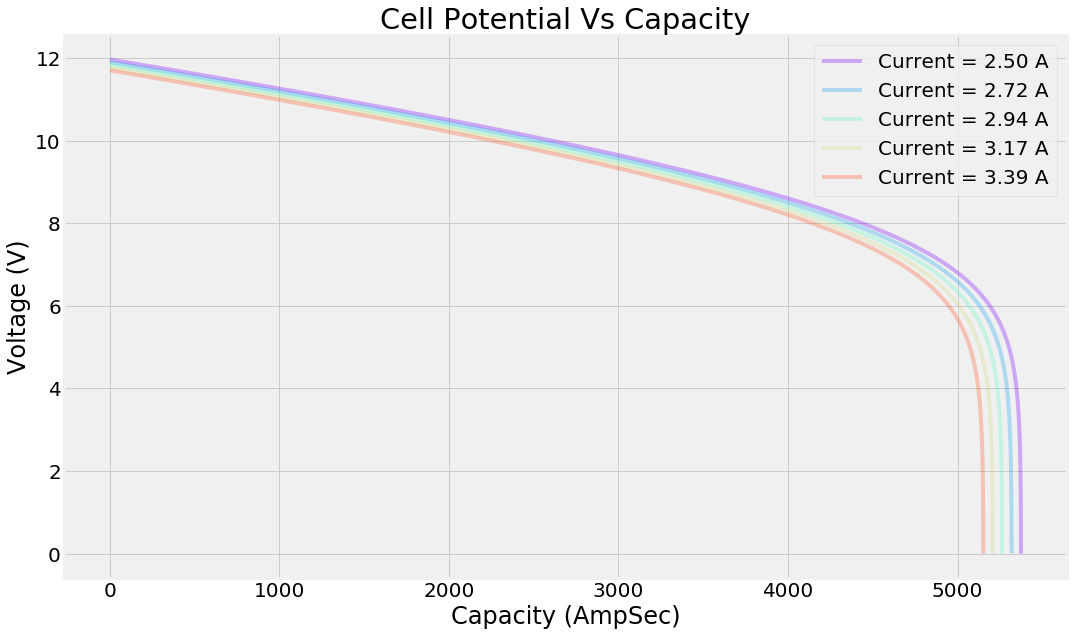

In [5]:
# Generate cell voltage profiles for various current discharge
dTmax = 3.0
dVmax = 0.01
numTraces = 10
ampDraw = np.linspace(2.5, 3.5, numTraces)

color=cm.rainbow(np.linspace(0, 1, numTraces))
curveDictList = []
for iStep in np.arange(numTraces):
    curCurveDict = calcTrace_constAmpCycle_varTS(ampDraw[iStep], 0, dTmax=dTmax, dVmax=dVmax)
    curveDictList.append(curCurveDict)

fig, axs = plt.subplots(figsize=(16, 10))
legendStrList = []
for iLoop, iCD in enumerate(curveDictList):
    if (iLoop%2 == 0):   
        axs.plot(iCD['tList'], iCD['VList'], 'b', alpha = 0.3, c=color[iLoop])
        legendStrList.append('Current = ' + '%.2f'%(ampDraw[iLoop]) + ' A' )
    
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Voltage (V)')
plt.legend(legendStrList)
plt.title('Cell Potential Vs Time')
plt.savefig('PristineBatteryDOE_V_s.png')

fig, axs = plt.subplots(figsize=(16, 10))
for iLoop, iCD in enumerate(curveDictList):
    if iLoop%2 == 0:
        axs.plot(iCD['AsList'], iCD['VList'], 'b', alpha = 0.3, c=color[iLoop])
axs.set_xlabel('Capacity (AmpSec)')
axs.set_ylabel('Voltage (V)')
plt.legend(legendStrList)
plt.title('Cell Potential Vs Capacity')
plt.savefig('PristineBatteryDOE_V_As.png')

## Battery Degradation

The typical degradation in cell potential, across charge-discharge cycles, for the same current discharge, is shown below. With cycling, the capability of the battery to deliver a voltage will decrease even for the same current draw. Experimental results validating such a behavior can be found in literature.

While there are several approaches for modeling battery characteristics, including physics and hybrid models, what we intend to illustrate in this blog, is a data-driven approach and how to utilize such a model for estimating the state of health (or degradation) of the battery. The key advantage of this approach is that the model requires data only from pristine (little or no degradation) batteries and the extent of degradation can simply be tracked as an anomaly (i.e., a change from the nominal behavior), for incipient detection. Further, the model lends itself for continuous updating with measurements, which is critical for accurate prediction of cell potential. This is essential for creating the digital twin of an asset, since every customer operation of an asset is unique. We refer to this as a model of “one”, where we can continuously update the model to track a “particular” customers usage in the field. The challenge is in doing this in a computationally efficient manner with sporadic field measurements.

In this regard, we used the following equations to generate the to capture the discharge curve: 
$V(t) = a - 0.0005 * Q(t) + log(b - Q(t))$, where $a = 4 - 0.25 * I(t)$ and $b = 6000 - 250 * I(t)$ is the discharge current and $Q$ represents the charge held by the battery with $Q(t) = \int_{0}^{t}Idt$. 
It should be noted that the values of a and b are notional and representative of discharge curve profiles

Every application is unique and utilizes the battery differently - For example, full discharge vs partial discharge, discharging and recharging at various rates. The usage of each battery along with manufacturing process variation affect how each battery degrades. We simulate this by choosing a random value for the degradation parameter and computing a response for a random usage at a random cycle. With cycling, a battery would degrade in performance and provide a lower voltage and lower overall capacity. To illustrate the concept of degradation tracking with a simple example, we will model the deterioration by functionally altering the linear and asymptotic segments of the battery for the entire cycle by a deterioration factor. 

If $\delta$ is the deterioration factor, then the paramters $a$ and $b$ are modified as ($a = 4 - 0.25*(1+\delta)*I(t)$) and modified asymptotic ($b = 6000 - 250*(1+2*\delta)*I(t)$, respectively. The data from degraded batteries are used for model updating, and not for building the initial model. We understand that this functional form is an approximation but still representative of field behavior of a battery. Representative plots are given

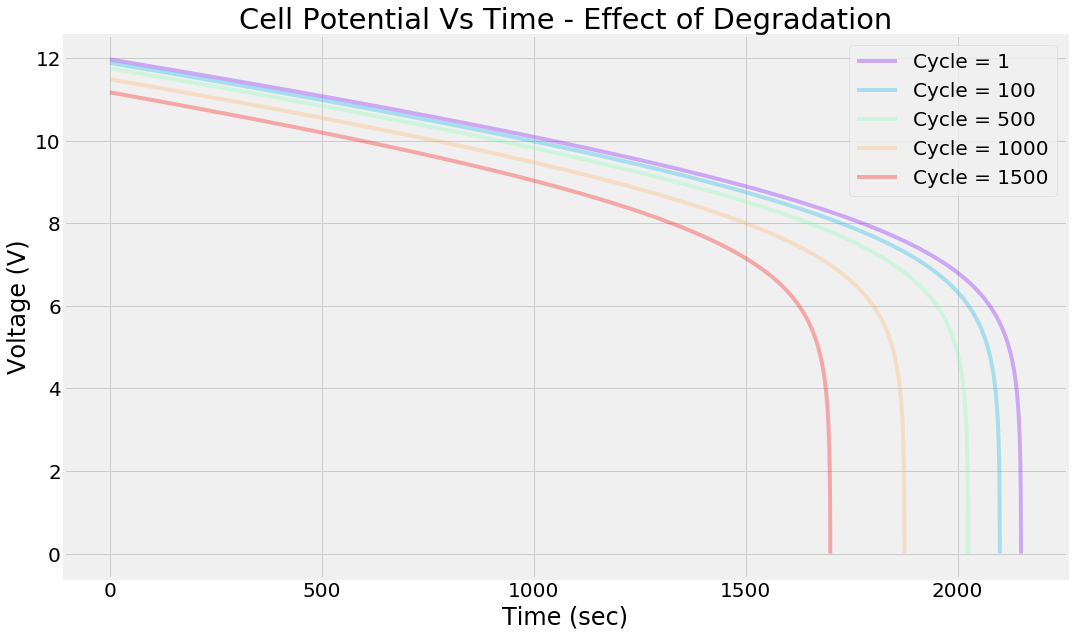

In [6]:
delta_vec = [0, 0.1, 0.25, 0.55, 0.9]
cycles = [1, 100, 500, 1000, 1500]
amp = 2.5
numTraces = len(delta_vec)
color=cm.rainbow(np.linspace(0, 1, numTraces))

newcurveDictList = []
for iStep in np.arange(numTraces):
    newcurCurveDict = calcTrace_constAmpCycle_varTS(amp, delta_vec[iStep], dTmax=dTmax, dVmax=dVmax)
    newcurveDictList.append(newcurCurveDict)

fig, axs = plt.subplots(figsize=(16, 10))
legendStrList = []
for iLoop, iCD in enumerate(newcurveDictList):
    axs.plot(iCD['tList'], iCD['VList'], 'b', alpha = 0.3, c=color[iLoop])
    legendStrList.append('Cycle = ' + str(cycles[iLoop]) )
    
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Voltage (V)')
plt.legend(legendStrList)
plt.title('Cell Potential Vs Time - Effect of Degradation')
plt.savefig('Degraded_Battery_Cell_Potential.png')

## Known Unknowns Vs Unknown Unknowns

With the above dataset, this problem can be cast either as a known-unknown case or an unknown-unknown case. This problem can be solved as a known-unknown case, if the modeler knows the physics-equation that describes the degradation phenomena and thus understands the specific way in which the degradation parameter ($\delta$) interacts with the physics equation. Knowing these specific details, the modeler can cast this as a model update problem as described in the [second](https://medium.com/tensorflow/predicting-known-unknowns-with-tensorflow-probability-industrial-ai-part-2-2fbd3522ebda) part of our blog series.

However, if the underlying physics is unknown, then the modeler has no option but to use the “raw” data to build a data-driven model and then update the data-driven model as the model performance deteriorates. Without specifically knowing the degradation mechanism, the modeler may be left with no choice but to update a large section of the data-driven model in the hope that there would be sufficient degrees of freedom in the model and sufficient information in the new dataset to update the model accurately. This is one manifestation of the unknown-unknown problem that is pervasive in real world applications. 

We will show the latter case of modeling the unknown-unknown here by building a DNN model with the data from pristine batteries. We have provided representative values to ensure the reader can create the data to build a "generic" deep learning model. The pristine data generated for building the DNN model is shown below with training data marked as blue and testing data marked as red.


## Building the initial model

The code for building a deep neural network model using TensorFlow is given below. 
Split the data into training and test data sets

In [7]:
from sklearn.model_selection import train_test_split

# Assemble the X and Y Vectors
AsListofList = []
AListofList = []
VListofList = []
for curDict in curveDictList:
    AsListofList.append(curDict['AsList'])
    AListofList.append(curDict['AList'])
    VListofList.append(curDict['VList'])

As1DArray = np.hstack(AsListofList)
A1DArray = np.hstack(AListofList)
V1DArray = np.hstack(VListofList)

nOverall = len(As1DArray)
xOverall = np.zeros([nOverall, 2])
xOverall[:,0] = A1DArray
xOverall[:,1] = As1DArray

yOverall = V1DArray

# Split into train and test vectors
xTrain, xTest, yTrain, yTest = train_test_split(xOverall, yOverall, 
                                                  test_size=0.33, 
                                                  random_state=42)
yTrain = yTrain.reshape(-1, 1)
yTest = yTest.reshape(-1, 1)

Scale the training data before model building and save the scaling factors

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

scalerX = MinMaxScaler().fit(xTrain)
scalerY = MinMaxScaler().fit(yTrain)

# Dump the scaler to the pickle file
scaler_filename = 'scaler.save'
joblib.dump([scalerX, scalerY], scaler_filename)

# Scale Train data
xTrain_scaled = scalerX.transform(xTrain)
yTrain_scaled = scalerY.transform(yTrain)
# Scale Test data
xTest_scaled = scalerX.transform(xTest)
yTest_scaled = scalerY.transform(yTest)

print('xTrain:\t{}'.format(xTrain.shape))
print('yTrain:\t{}'.format(yTrain.shape))
print('xTest:\t{}'.format(xTest.shape))
print('yTest:\t{}'.format(yTest.shape))

xTrain:	(8618, 2)
yTrain:	(8618, 1)
xTest:	(4246, 2)
yTest:	(4246, 1)


Define the weights, biases and layers of the neural network

In [9]:
# weight and bias wrappers
def weight_variable(name, shape):
    """
    Create a weight variable with appropriate initialization
    :param name: weight name
    :param shape: weight shape
    :return: initialized weight variable
    """
    initer = tf.truncated_normal_initializer(stddev=0.01)
    with tf.variable_scope('', reuse=tf.AUTO_REUSE):
        return tf.get_variable('W_' + name,
                               dtype=tf.float32,
                               shape=shape,
                               initializer=initer)

def bias_variable(name, shape):
    """
    Create a bias variable with appropriate initialization
    :param name: bias variable name
    :param shape: bias variable shape
    :return: initialized bias variable
    """
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    with tf.variable_scope('', reuse=tf.AUTO_REUSE):
        return tf.get_variable('b_' + name,
                               dtype=tf.float32,
                               initializer=initial)

# Create fully connected layer
def fc_layer(x, num_units, name, use_relu=True):
    """
    Create a fully-connected layer
    :param x: input from previous layer
    :param num_units: number of hidden units in the fully-connected layer
    :param name: layer name
    :param use_relu: boolean to add ReLU non-linearity (or not)
    :return: The output array
    """
    in_dim = x.get_shape()[1]
    W = weight_variable(name, shape=[in_dim, num_units])
    b = bias_variable(name, [num_units])
    layer = tf.matmul(x, W)
    layer += b
    if use_relu:
        layer = tf.nn.relu(layer)
    return layer


### Create a Tensorflow Model

A fully connected neural network, with 5 hidden layers, is created using TensorFlow

In [10]:
tf.reset_default_graph()
tf.random.set_random_seed(rand_seed)
np.random.RandomState(seed=rand_seed)

# Placeholders for inputs (x) and outputs(y)
x = tf.placeholder(tf.float32, shape=[None, 2], name='X')
y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')

# Create a fully-connected layer with h1 nodes as hidden layer
fc1 = fc_layer(x, 4, 'FC1', use_relu=True)
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
do1 = tf.nn.dropout(fc1, keep_prob=keep_prob)    
fc2 = fc_layer(do1, 16, 'FC2', use_relu=True)
fc3 = fc_layer(fc2, 64, 'FC3', use_relu=True)
fc4 = fc_layer(fc3, 16, 'FC4', use_relu=True)
fc5 = fc_layer(fc4, 4, 'FC5', use_relu=True)

# Create a fully-connected layer with n_classes nodes as output layer
output_pred = fc_layer(fc5, 1, 'OUT', use_relu=False)

# Create Handles for use in prediction module
tf.add_to_collection('output_pred', output_pred)
tf.add_to_collection('x', x)

# Hyper-parameters
epochs = 200             # Total number of training epochs
batch_size = 10             # Training batch size
display_freq = 50             # Frequency of displaying the training results
learning_rate = 0.005   # The optimization initial learning rate

# Define the loss function, optimizer, and accuracy
error = tf.reduce_mean(tf.squared_difference(y, output_pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, name='Adam-op').minimize(error)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation, :]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

def get_next_batch(x, y, start, end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch, y_batch

# Create the op for initializing all variables
init = tf.global_variables_initializer()

# Create an interactive session (to keep the session in the other cells)
sess = tf.InteractiveSession()
tf.random.set_random_seed(rand_seed)
np.random.RandomState(seed=rand_seed)

# Initialize all variables
sess.run(init)
# Number of training iterations in each epoch
num_tr_iter = int(len(yTrain_scaled) / batch_size)
for epoch in range(epochs): 
    if (epoch % display_freq) == 0:
        print('Training epoch: {}'.format(epoch + 1))
    # Randomly shuffle the training data at the beginning of each epoch 
    xTrain_scaled, yTrain_scaled = randomize(xTrain_scaled, yTrain_scaled)
    for iteration in range(num_tr_iter):
        start = iteration * batch_size
        end = (iteration + 1) * batch_size
        x_batch, y_batch = get_next_batch(xTrain_scaled, yTrain_scaled, start, end)

        # Run optimization op (backprop)
        feed_dict_batch = {x: x_batch, y: y_batch, keep_prob: 0.9}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % (4*display_freq) == 0:
            # Calculate and display the batch loss and accuracy
            error_batch = sess.run([error],
                                   feed_dict=feed_dict_batch)
            if (epoch % display_freq) == 0:
                print("iter {0:3d}:\t Error={1:.6f}".
                      format(iteration, error_batch[0]))

    # Run validation after every epoch
    feed_dict_test = {x: xTest_scaled, y: yTest_scaled, keep_prob: 1.0}
    error_valid = sess.run([error], feed_dict=feed_dict_test)
    # Print error after every 50 epochs
    if (epoch % display_freq) == 0:
        print('---------------------------------------------------------')
        print("Epoch: {0}, validation error: {1:.6f}".
              format(epoch + 1, error_valid[0]))
        print('---------------------------------------------------------')

print('Neural Network Model Building Completed')


Training epoch: 1
iter   0:	 Error=0.378195
iter 200:	 Error=0.070945
iter 400:	 Error=0.017254
iter 600:	 Error=0.017892
iter 800:	 Error=0.007172
---------------------------------------------------------
Epoch: 1, validation error: 0.007863
---------------------------------------------------------
Training epoch: 51
iter   0:	 Error=0.011260
iter 200:	 Error=0.006001
iter 400:	 Error=0.004483
iter 600:	 Error=0.008322
iter 800:	 Error=0.003724
---------------------------------------------------------
Epoch: 51, validation error: 0.005911
---------------------------------------------------------
Training epoch: 101
iter   0:	 Error=0.004946
iter 200:	 Error=0.005511
iter 400:	 Error=0.002990
iter 600:	 Error=0.004129
iter 800:	 Error=0.011211
---------------------------------------------------------
Epoch: 101, validation error: 0.008250
---------------------------------------------------------
Training epoch: 151
iter   0:	 Error=0.000071
iter 200:	 Error=0.010259
iter 400:	 Error=0.

In [12]:
# Predict on training and test data
feed_dict = {x: xTrain_scaled, keep_prob: 1.0}
y_pred_train = sess.run(output_pred, feed_dict = feed_dict)
feed_dict = {x: xTest_scaled, keep_prob: 1.0}
y_pred_test = sess.run(output_pred, feed_dict = feed_dict)
    
# Save the model
#Create a saver object which will save all the variables
saver = tf.train.Saver()
model_name = './my_model'
#Now, save the graph
saver.save(sess, model_name)

'./my_model'

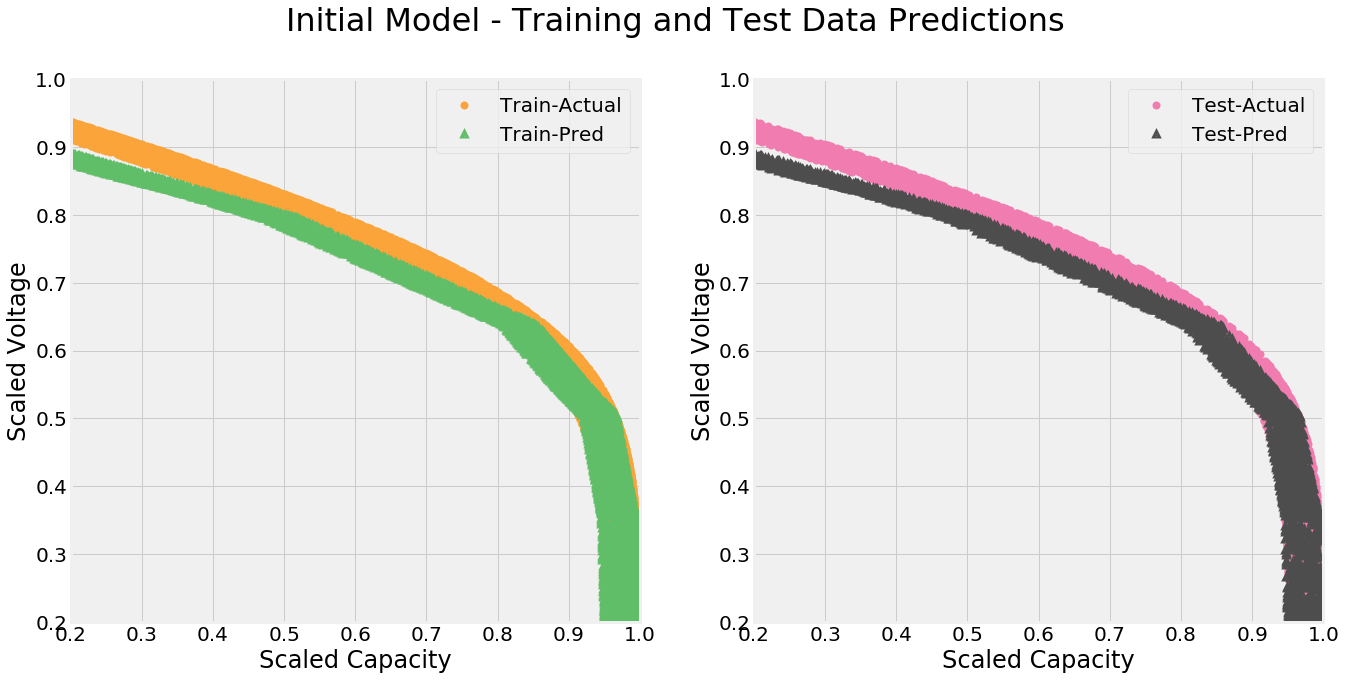

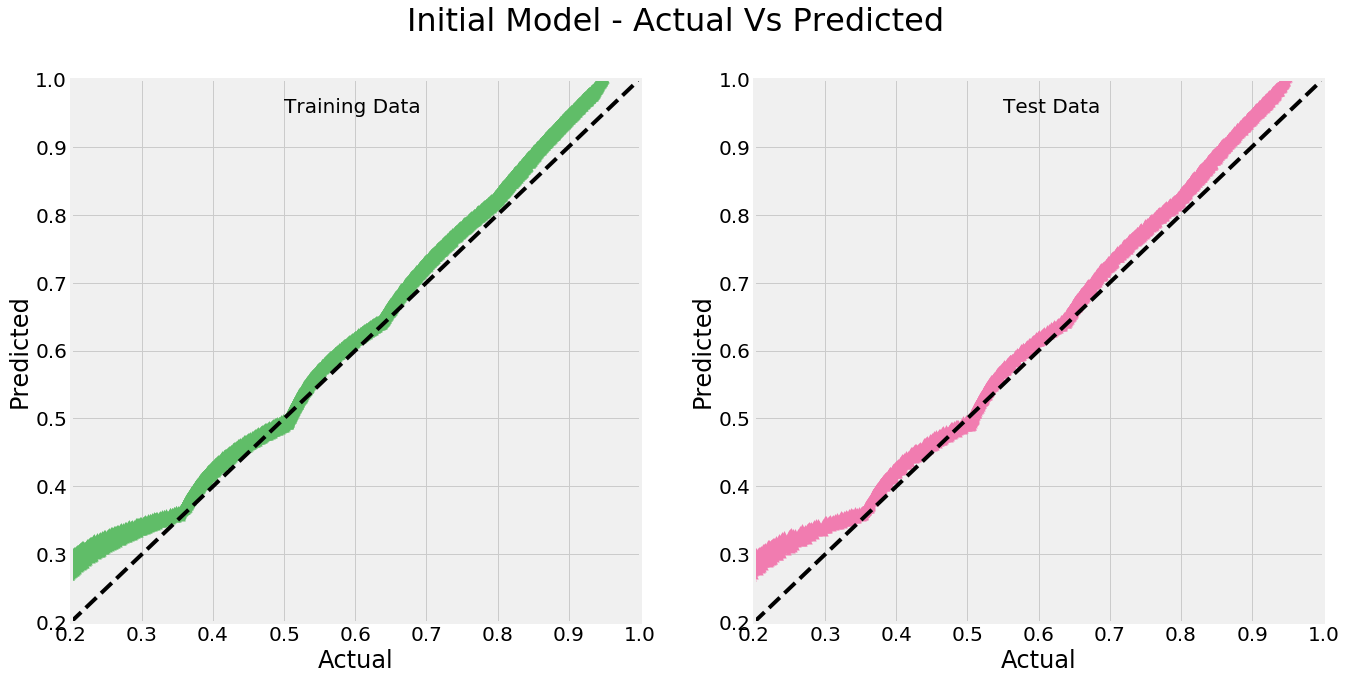

In [13]:
fig, axs = plt.subplots(figsize=(20, 10))
fig.suptitle('Initial Model - Training and Test Data Predictions', fontsize=32)
plt.subplot(121)
plt.plot(xTrain_scaled[:,1], yTrain_scaled, 'o', markersize=4, markeredgewidth=4, color=TFColor[1])
plt.plot(xTrain_scaled[:,1], y_pred_train, '^', markersize=4, markeredgewidth=4, color=TFColor[2])
plt.legend(['Train-Actual', 'Train-Pred'])
plt.xlabel('Scaled Capacity')
plt.ylabel('Scaled Voltage')
plt.xlim([0.2, 1])
plt.ylim([0.2, 1])
plt.subplot(122)
plt.plot(xTest_scaled[:,1], yTest_scaled, 'o', markersize=4, markeredgewidth=4, color=TFColor[4])
plt.plot(xTest_scaled[:,1], y_pred_test, '^', markersize=4, markeredgewidth=4, color=TFColor[8])
plt.xlabel('Scaled Capacity')
plt.ylabel('Scaled Voltage')
plt.xlim([0.2, 1])
plt.ylim([0.2, 1])
plt.legend(['Test-Actual', 'Test-Pred'])
plt.savefig('OverlayValidationPlot.png')

fig, axs = plt.subplots(figsize=(20, 10))
fig.suptitle('Initial Model - Actual Vs Predicted', fontsize=32)
plt.subplot(121)
plt.plot(y_pred_train, yTrain_scaled, '^', markersize=4, markeredgewidth=4, color=TFColor[2])
plt.text(0.5, 0.95, 'Training Data')
plt.plot([0,1], [0, 1], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim([0.2, 1])
plt.ylim([0.2, 1])
plt.subplot(122)
plt.plot(y_pred_test, yTest_scaled, '^',  markersize=4, markeredgewidth=4, color=TFColor[4])
plt.plot([0,1], [0, 1], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim([0.2, 1])
plt.ylim([0.2, 1])
plt.text(0.55, 0.95, 'Test Data')
plt.savefig('45DegreeValidationPlot.png')

In [14]:
class predictModel(object):
    def __init__(self, sess, scalerX, scalerY,
                 pred_node_name='output_pred', input_node_name='x'):
        self.sess = sess
        self.scalerX = scalerX
        self.scalerY = scalerY
        # Get the Graph Object and extract the prediction node
        self.graph = sess.graph
        self.pred_node = tf.get_collection(pred_node_name)[0]
        self.x = tf.get_collection(input_node_name)[0]
        self.keep_prob = self.graph.get_tensor_by_name('keep_prob:0')

    def predictSingleRowBasic(self, p_ampDraw, p_ampSec):
        X_pred = np.array([p_ampDraw, p_ampSec])
        X_pred_reshape = X_pred.reshape(1, -1)
        s_X_pred = self.scalerX.transform(X_pred_reshape)
        s_p_output = self.sess.run(self.pred_node, feed_dict={self.x: s_X_pred, self.keep_prob: 1.0})
        # Invert the scalar to get actual prediction
        p_output = self.scalerY.inverse_transform(s_p_output)
        return p_output

    def predictSingleRowAugmented(self, p_ampDraw, p_ampSec, nameValueDict):
        X_pred = np.array([p_ampDraw, p_ampSec])
        X_pred_reshape = X_pred.reshape(1, -1)
        s_X_pred = self.scalerX.transform(X_pred_reshape)

        feed_dict = {self.x: s_X_pred, self.keep_prob: 1.0}
        for curKey in list(nameValueDict.keys()):
            curTFNode = self.graph.get_tensor_by_name(curKey)
            feed_dict[curTFNode] = list(nameValueDict[curKey])
        s_p_output = self.sess.run(self.pred_node, feed_dict=feed_dict)
        # Invert the scalar to get actual prediction
        p_output = self.scalerY.inverse_transform(s_p_output)
        return p_output

    def predictProfileBasic(self, p_ampDraw, alpha, p_dT):

        # Predict the Initial point
        t_list = []
        v_list = []
        loc_t = 0
        loc_as = 0
        runLoop = True
        while runLoop:
            p_ampDraw_1 = p_ampDraw * (1 + alpha)
            loc_as_1 = loc_as * (1 + 2 * alpha)
            X_pred = np.array([p_ampDraw_1, loc_as_1])
            X_pred_reshape = X_pred.reshape(1, -1)
            s_X_pred = self.scalerX.transform(X_pred_reshape)
            s_p_output = self.sess.run(self.pred_node, feed_dict={self.x: s_X_pred, self.keep_prob: 1.0})
            p_output = self.scalerY.inverse_transform(s_p_output)

            if (p_output[0, 0] < 6):
                runLoop = False
            else:
                t_list.append(loc_t)
                v_list.append(p_output[0, 0])

                loc_t += p_dT
                loc_as += p_ampDraw * p_dT

        return t_list, v_list

    def predictProfileAugmented(self, p_ampDraw, nameValueDict, p_dT, tStart, tEnd):
        loc_t = tStart
        loc_as = p_ampDraw * (loc_t)
        time_list = []
        voltage_list = []
        runLoop = True
        while (loc_t <= tEnd) & runLoop:
            X_pred = np.array([p_ampDraw, loc_as])
            X_pred_reshape = X_pred.reshape(1, -1)
            s_X_pred = self.scalerX.transform(X_pred_reshape)

            # [s_p_ampDraw, s_p_ampSec] = p_scalerX.transform(X_pred_reshape)
            feed_dict = {self.x: s_X_pred, self.keep_prob: 1.0}
            for curKey in list(nameValueDict.keys()):
                curTFNode = self.graph.get_tensor_by_name(curKey)
                feed_dict[curTFNode] = list(nameValueDict[curKey])

            s_p_output = self.sess.run(self.pred_node, feed_dict=feed_dict)
            # Invert the scalar to get actual prediction
            p_output = self.scalerY.inverse_transform(s_p_output)
            
            time_list.append(loc_t)
            voltage_list.append(p_output[0, 0])

            loc_t += p_dT
            loc_as += p_ampDraw * p_dT

            # if (p_output[0, 0] < 6):
            #    runLoop = False
            #else:
            #    time_list.append(loc_t)
            #    voltage_list.append(p_output[0, 0])

            #    loc_t += p_dT
            #    loc_as += p_ampDraw * p_dT

        return time_list, voltage_list


## Tracking Battery Degradation

The voltage/current characteristics of a battery change over time due to usage. The degradation is an unknown anomaly as this information was unavailable during the initial model development. Further, the degradation is generally asset-specific, i.e., the extent of degradation varies from battery to battery. The original model, developed using charging characteristics of prisitine batteries, cannot accurately predict the behavior of a degraded battery. Therefore, the original model needs to be updated with newly available data to accurately reflect the current state of a specific battery. An example of battery degradation is plotted below:

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./my_model


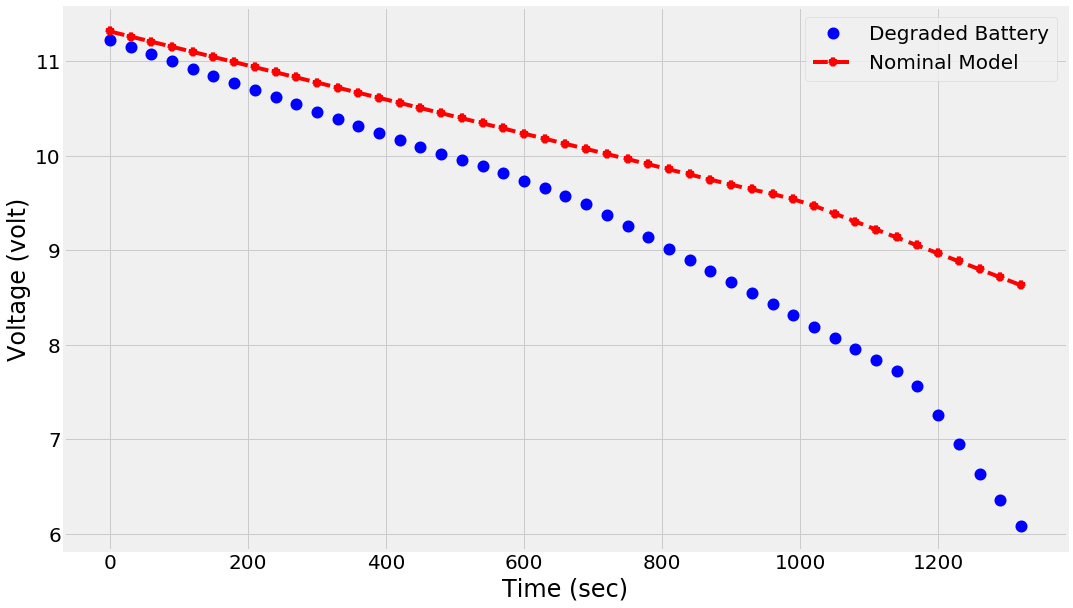

In [15]:
p_ampDraw = 2.7
delta = 0.2
p_dT = 30

if(sess._closed):
    sess = tf.InteractiveSession()
model_name = './my_model.meta'
saver = tf.train.import_meta_graph(model_name)
saver.restore(sess, tf.train.latest_checkpoint('./'))
[p_scalerX, p_scalerY] = joblib.load(scaler_filename) 

# Initialize the class
loc_pm = predictModel(sess, p_scalerX, p_scalerY)
    
# Demonstrate Basic Prediction Class
time_deg, voltage_deg = loc_pm.predictProfileBasic(p_ampDraw, delta, p_dT)
max_indx = len(time_deg)
# Demonstrate the Augmented Class
tvars = tf.trainable_variables()
tvars_vals = sess.run(tvars)

tVarDict = {}
for var, val in zip(tvars, tvars_vals):
    # print(var.name, val)  # Prints the name of the variable alongside its value.
    tVarDict[var.name] = val

# Perform the base Run with the same values
time_base, voltage_base = loc_pm.predictProfileAugmented(p_ampDraw, tVarDict, p_dT, time_deg[0], time_deg[max_indx-1])

fig, axs = plt.subplots(figsize=(16, 10))
axs.plot(time_deg, voltage_deg, color='b', linestyle='None', marker='o', mew=4, ms=8)
axs.plot(time_base, voltage_base, color='r', linestyle='--', marker='*', mew=4, ms=8)
plt.legend(('Degraded Battery', 'Nominal Model'))
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (volt)')
plt.savefig('NominalVsActual.png')


## Model Updating

Particle Filter (PF) can be characterized as a technique for implementing a recursive Bayesian filter by Monte Carlo simulations. The key idea is to represent the posterior density function by a set of random samples with associated weights and to compute estimates based on these samples and weights. As the number of samples becomes very large, and the PF estimate approaches the optimal Bayesian estimate. For an exhaustive discussion on the various PF algorithms, refer to this [tutorial](https://ieeexplore.ieee.org/abstract/document/978374).


### Particle Filter Implementation

In [16]:
import warnings
from copy import deepcopy

warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

model_name_meta = model_name  #'./my_model.meta'
saver = tf.train.import_meta_graph(model_name_meta)
saver.restore(sess, tf.train.latest_checkpoint('./'))
# Load the scaler
[p_scalerX, p_scalerY] = joblib.load(scaler_filename)

# Initialize the class
loc_pm = predictModel(sess, p_scalerX, p_scalerY)

# Create Degraded Battery Data
#p_ampDraw = random.uniform(2.0, 4.0) # Current draw is between 2 - 4 amps
# p_ampDraw = 2.0
print('Amp Draw: %f'%(p_ampDraw))

#delta =  sess.run(tf.random.uniform((1, ), 0.1, 0.4)) # Pick between 10% & 40% deteriorated battery
# delta = 0.17
print('Deterioration: %f'%(delta))
# p_dT = 60
time_list, voltage_deg = loc_pm.predictProfileBasic(p_ampDraw, delta, p_dT)

# Add measurement noise
meas_std = 0.1
num_data = len(voltage_deg)
noise_tf = tfd.Normal(0, meas_std).sample(num_data)
noise = sess.run(noise_tf)
voltage_deg = voltage_deg + noise

# Get Initial Model Predictions
tvars = tf.trainable_variables()
tvars_vals = sess.run(tvars)

tVarDict = {}
for var, val in zip(tvars, tvars_vals):
    # print(var.name, val)  # Prints the name of the variable alongside its value.
    tVarDict[var.name] = val

voltage_base = []
for i in np.arange(len(time_list)):
    p_ampSec = p_ampDraw*time_list[i]
    volt_val = loc_pm.predictSingleRowAugmented(p_ampDraw, p_ampSec, tVarDict)
    voltage_base.append(volt_val[0, 0])

# Initial States of the PF
baseB_Out = tVarDict['b_OUT:0']
baseW_Out = tVarDict['W_OUT:0']
num_st = len(baseW_Out) + 1

# Assign Initial State and covariance
x_init = np.zeros((num_st, 1))
x_init[0, 0] = baseB_Out

for idxW in np.arange(len(baseW_Out)):
    x_init[idxW+1, 0] = baseW_Out[idxW, 0]
print('Init State = ', x_init)
cov_init = np.eye(num_st) * 1e-4

# Set Process and Measurement Covariances
Q = 1e-4
R = meas_std**2

# Total Number of Data Points
num_data = len(time_list)

cov_prev = cov_init
x_prev = x_init

tVarDict_new = deepcopy(tVarDict)
volt_val_init =[]
volt_val_updt = []

x_Mat = np.matrix(np.zeros((num_st, num_data)))

INFO:tensorflow:Restoring parameters from ./my_model
Amp Draw: 2.700000
Deterioration: 0.200000
Init State =  [[ 0.13502017]
 [ 0.02020376]
 [-0.0044075 ]
 [ 0.11079943]
 [ 0.17626527]]


### Set Particle Filter Parameters

In [17]:
# PF Parameters
pf = {}
pf['Ns'] = 500     # Number of particles
pf['state'] = x_init #  State Vector
pf['state_cov'] = cov_init #  State Covariance
pf['Q'] = np.eye(num_st) * Q #  Process Covariance Matrix
pf['R'] = R    # Measurement Covariance

### Generate Initial Particles

In [18]:
# Generate Particles
tf.random.set_random_seed(rand_seed)
np.random.RandomState(seed=rand_seed)

state = np.array(pf['state'])
state.shape = (num_st, )
mvn = tfd.MultivariateNormalFullCovariance(loc=state, covariance_matrix=pf['state_cov'])
particles = sess.run(mvn.sample(pf['Ns']))
pf['particles'] = particles.T
pf['weights'] = np.ones((pf['Ns'], 1))/pf['Ns']
pf['Neff'] = list()
pf['yVec'] = list()
pf['yLow'] = list()
pf['yHigh'] = list()
pf['conf_low'] = 0.15
pf['conf_high'] = 99.85
pf_particles_list = []

### Model Prediction - One Step

In [19]:
def pf_predout(coef, loc_pm, p_ampDraw, time_val, tVarDict_new):
    
    p_ampSec = p_ampDraw * time_val
    baseW_Out = tVarDict['W_OUT:0']
    n_dim = len(coef)

    coef = np.array(coef)
    coef.shape = (n_dim,)
    
    tVarDict_new['b_OUT:0'] = [coef[0]]
    for idxW in np.arange(len(baseW_Out)):
        baseW_Out[idxW, 0] = coef[idxW + 1]
    tVarDict_new['W_OUT:0'] = baseW_Out

    yhat = np.asmatrix(loc_pm.predictSingleRowAugmented(p_ampDraw, p_ampSec, tVarDict_new))

    return yhat

### Update Weights

In [20]:
def update_weights(y, yhat, R, prev_weight): 
    from scipy.stats import norm
    
    likelihood = norm.pdf(y-yhat, 0, R)
    updt_weight = prev_weight * likelihood
    
    return updt_weight

### Resampling

In [21]:
def systematic_resample(sess, weights):
    N = len(weights)

    # make N subdivisions and choose positions with a random offset
    positions = (sess.run(tf.random.uniform((1, ))) + np.arange(N)) / N

    indexes = np.zeros(N, 'i')
    cum_sum = np.cumsum(weights)
    i, j = 0, 0
    while i < N:
        if positions[i] < cum_sum[j]:
            indexes[i] = j
            i = i + 1
        else:
            j = j + 1
    return indexes

def resample_from_index(particles, weights, indexes):
    particles = particles[:, indexes]
    weights = weights[indexes]
    weights.fill(1.0 / len(weights))

    return particles, weights, indexes

### Particle Filtering

In [22]:
def particle_filter(sess, yk, pf, loc_pm, p_ampDraw, time_val, tVarDict_new, pf_particles_list):

    Ns = pf['Ns']  # Number of samples
    prev_particles = pf['particles']
    pf_particles_list.append(pf['particles'])

    prev_weights = pf['weights']
    nx = prev_particles.shape[0]
    proc_cov = pf['Q']
    meas_std = np.sqrt(pf['R'])

    mvn = tfd.MultivariateNormalFullCovariance(loc=np.zeros(nx), covariance_matrix=proc_cov)
    proc_noise = sess.run(mvn.sample(Ns))
    proc_noise = proc_noise.T

    cur_particles = prev_particles + proc_noise
    cur_weights = np.zeros((Ns,))

    ypred = np.zeros(Ns)

    for i in np.arange(Ns):
        ypred[i] = pf_predout(cur_particles[:, i], loc_pm, p_ampDraw, time_val, tVarDict_new)
        cur_weights[i] = update_weights(yk, ypred[i], meas_std, prev_weights[i])
        cur_weights[i] = cur_weights[i] + 1e-100

    ylow = np.percentile(ypred, pf['conf_low'])
    yhigh = np.percentile(ypred, pf['conf_high'])

    pf['yLow'].append(ylow)
    pf['yHigh'].append(yhigh)

    # Normalize weight vector
    cur_weights = cur_weights / np.sum(cur_weights)

    Neff = 1. / np.sum(np.square(cur_weights))
    resample_percent = 0.5
    Nt = resample_percent * Ns

    if Neff < Nt:
        indexes = systematic_resample(sess, cur_weights)
        cur_particles, cur_weights, indexes = resample_from_index(cur_particles, cur_weights, indexes)

    # Compute estimated state
    xhat = np.average(cur_particles, weights=cur_weights, axis=1)
    xhat.shape = (nx, 1)
    covhat = np.average((cur_particles - xhat) ** 2, weights=cur_weights, axis=1)

    # Update PF parameters
    pf['weights'] = cur_weights
    pf['particles'] = cur_particles
    pf['state'] = xhat
    pf['state_cov'] = np.diag(covhat)
    pf['Neff'].append(Neff)
    
    return xhat, pf

### Update Model with Particle Filter

In [23]:
import warnings

warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

if(sess._closed):
    sess = tf.InteractiveSession()
    
sess.run(tf.global_variables_initializer())
x_cur = x_init
cov_cur = cov_init

volt_val_init = []
pf_particles_list = []
update_point_list = []
med_time_list = []
med_volt_list = []
val_low_list = []
val_high_list = []
temp_low = []
temp_high = []
count = 0

for i in np.arange(num_data):   
    p_ampSec = p_ampDraw * time_list[i]
    dummy = loc_pm.predictSingleRowAugmented(p_ampDraw, p_ampSec, tVarDict_new)
    
    cur_particles = pf['particles']
    ypred = np.zeros(pf['Ns'])
    for j in np.arange(pf['Ns']):
        ypred[j] = pf_predout(cur_particles[:, j], loc_pm, p_ampDraw, time_list[i], tVarDict_new)

    ylow = np.percentile(ypred, pf['conf_low'])
    yhigh = np.percentile(ypred, pf['conf_high'])
    
    if (i > 0): 
        if ((voltage_deg[i] < ylow) | (voltage_deg[i] > yhigh)): 
            volt_updt_list = []
            time_updt_list = []
            count = count + 1
            update_point_list.append(i+1)
                    
            xhat_plus, pf = particle_filter(sess, voltage_deg[i], pf, loc_pm, p_ampDraw, time_list[i], tVarDict_new, pf_particles_list) 
            cur_particles = pf['particles']
                    
            # Predict till the last time step with xhat_plus and all samples
            d = deepcopy(xhat_plus)
            xhat_plus.shape = (num_st, )  
            
            all_traces = np.zeros(( pf['Ns'], num_data-i))          

            for j in np.arange(pf['Ns']):
                state_vec = cur_particles[:, j]
                state_vec.shape = (num_st,)
                tVarDict_new['b_OUT:0'] = [state_vec[0]]
                for idxW in np.arange(len(baseW_Out)):
                    baseW_Out[idxW, 0] = state_vec[idxW + 1]
                tVarDict_new['W_OUT:0'] = baseW_Out
                time_pred, volt_pred = loc_pm.predictProfileAugmented(p_ampDraw, tVarDict_new, p_dT, time_list[i],
                                                          time_list[num_data - 1])
                all_traces[j, :] = np.array(volt_pred)

            val_low = np.percentile(all_traces, pf['conf_low'], axis=0)
            val_high = np.percentile(all_traces, pf['conf_high'], axis=0)

            val_low_list.append(val_low)
            val_high_list.append(val_high)
            
            tVarDict_new['b_OUT:0'] = [xhat_plus[0]]
            for idxW in np.arange(len(baseW_Out)):
                baseW_Out[idxW, 0] = xhat_plus[idxW + 1]
            tVarDict_new['W_OUT:0'] = baseW_Out       

            time_pred_1, volt_pred_1 = loc_pm.predictProfileAugmented(p_ampDraw, tVarDict_new, p_dT, time_list[i], time_list[num_data-1]) 
            med_time_list.append(time_pred_1)
            med_volt_list.append(volt_pred_1)   
            
            temp_low.append(val_low[0])
            temp_high.append(val_high[0]) 
            volt_val_init.append(volt_pred_1[0])
           
            if (int(pf['Neff'][i]) == int(pf['Ns'])):
                state = np.array(pf['state'])
                state.shape = (num_st,)
                mvn = tfd.MultivariateNormalFullCovariance(loc=state, covariance_matrix=cov_init)
                particles = sess.run(mvn.sample(pf['Ns']))
                pf['particles'] = particles.T        
        else:           
            Neff = pf['Neff'][-1]
            pf['Neff'].append(Neff)
            pf_particles_list.append(pf['particles'])
            pf['yLow'].append(ylow)
            pf['yHigh'].append(yhigh)
            temp_low.append(ylow)
            temp_high.append(yhigh)  
            volt_val_init.append(dummy[0, 0])
    else:
        volt_updt_list = []
        time_updt_list = []
        count = count + 1
        update_point_list.append(i+1)
              
        xhat_plus, pf = particle_filter(sess, voltage_deg[i], pf, loc_pm, p_ampDraw, time_list[i], tVarDict_new,
                                        pf_particles_list)
        cur_particles = pf['particles'] 
                
        # Predict till the last time step with xhat_plus and all samples
        d = deepcopy(xhat_plus)
        xhat_plus.shape = (num_st, )
           
        all_traces = np.zeros((pf['Ns'], num_data-i))      
        for j in np.arange(pf['Ns']):
            state_vec = cur_particles[:, j]
            state_vec.shape = (num_st,)
            tVarDict_new['b_OUT:0'] = [state_vec[0]]
            for idxW in np.arange(len(baseW_Out)):
                baseW_Out[idxW, 0] = state_vec[idxW + 1]
            tVarDict_new['W_OUT:0'] = baseW_Out
            time_pred, volt_pred = loc_pm.predictProfileAugmented(p_ampDraw, tVarDict_new, p_dT, time_list[i],
                                                      time_list[num_data - 1])
            all_traces[j, :] = np.array(volt_pred)

        val_low = np.percentile(all_traces, pf['conf_low'], axis=0)
        val_high = np.percentile(all_traces, pf['conf_high'], axis=0)

        val_low_list.append(val_low)
        val_high_list.append(val_high)
        
        tVarDict_new['b_OUT:0'] = [xhat_plus[0]]
        for idxW in np.arange(len(baseW_Out)):
            baseW_Out[idxW, 0] = xhat_plus[idxW + 1]
        tVarDict_new['W_OUT:0'] = baseW_Out     

        time_pred_1, volt_pred_1 = loc_pm.predictProfileAugmented(p_ampDraw, tVarDict_new, p_dT, time_list[i], time_list[num_data-1]) 
        med_time_list.append(time_pred_1)
        med_volt_list.append(volt_pred_1)   

        temp_low.append(val_low[0])
        temp_high.append(val_high[0])
        volt_val_init.append(volt_pred_1[0])
        
        if int(pf['Neff'][i]) == int(pf['Ns']):
            state = np.array(pf['state'])
            state.shape = (num_st, )
            mvn = tfd.MultivariateNormalFullCovariance(loc=state, covariance_matrix=cov_init)
            particles = sess.run(mvn.sample(pf['Ns']))
            pf['particles'] = particles.T
            
    x_Mat[:, i] = d
    d.shape = (num_st, )
    tVarDict_new['b_OUT:0'] = [d[0]]
    for idxW in np.arange(len(baseW_Out)):
        baseW_Out[idxW, 0] = d[idxW + 1]
    tVarDict_new['W_OUT:0'] = baseW_Out  
    xhat_plus.shape = (num_st, 1)
    d.shape = (num_st, 1)
    x_Mat[:, i] = d

print('Particle Filter Updating Complete')
print('Total Number of data points = ', num_data)
print('Number of data points used for model update = ', count)
print('Data points at which model was updated = ', update_point_list)
pf_particles_3d_array = np.dstack(pf_particles_list)

Particle Filter Updating Complete
Total Number of data points =  45
Number of data points used for model update =  8
Data points at which model was updated =  [1, 15, 18, 30, 37, 40, 42, 44]


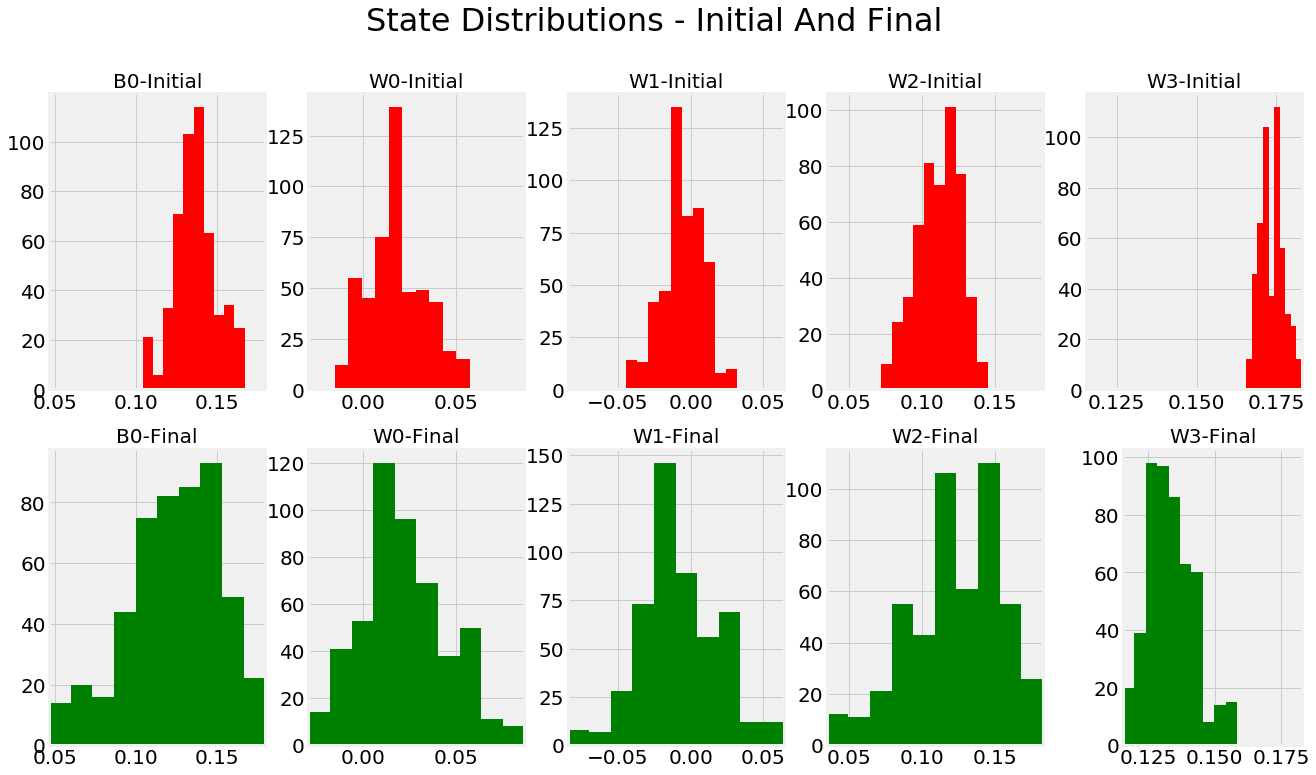

In [24]:
(num_var, Ns, num_ts) = pf_particles_3d_array.shape
fig, axs = plt.subplots(figsize=(20, 12)) 
fig.suptitle('State Distributions - Initial And Final', fontsize=32)
for var in np.arange(num_var):
    x1 = pf_particles_3d_array[var,:,1]
    x2 = pf_particles_3d_array[var,:,num_data-2]
    xlim = [np.min([x1, x2]), np.max([x1, x2])]
    fig_num = 250+var+1
    
    plt.subplot(fig_num)
    plt.hist(x1, 10, facecolor='red')
    plt.xlim(xlim)
    if var==0:
        title_str = 'B' + str(var) + '-Initial'
    else:
        title_str = 'W' + str(var-1) + '-Initial'
    plt.title(title_str, fontsize=20)
             
    fig_num = 250+num_var+var+1
    plt.subplot(fig_num)
    plt.hist(x2, 10, facecolor='green')
    plt.xlim(xlim)
    if var==0:
        title_str = 'B' + str(var) + '-Final'
    else:
        title_str = 'W' + str(var-1) + '-Final'
    plt.title(title_str, fontsize=20)
plt.savefig('StateDistributions.png')

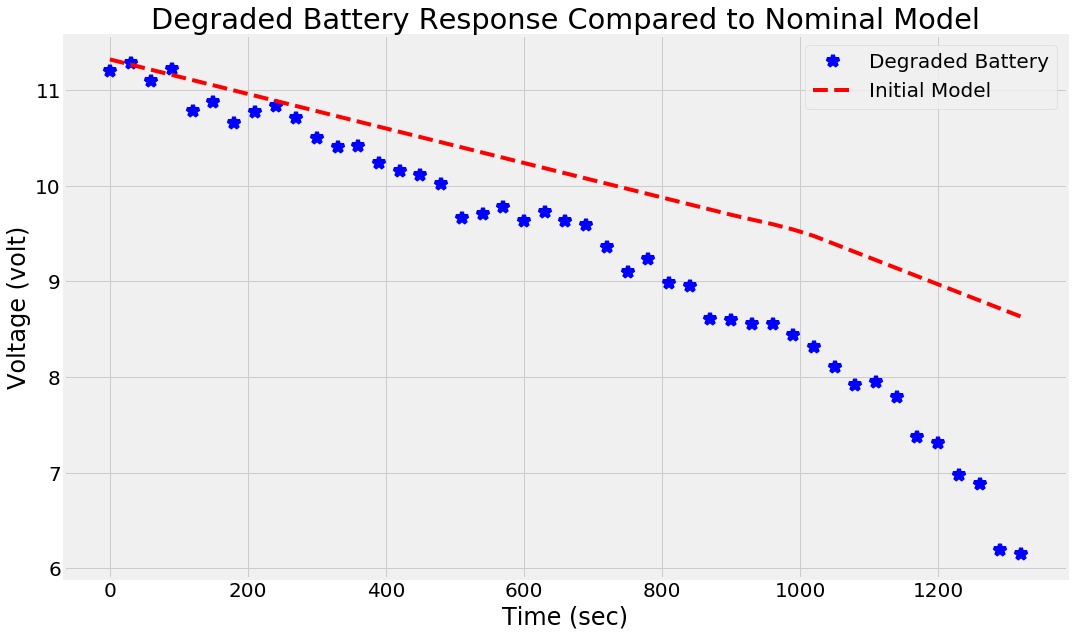

In [25]:
fig, axs = plt.subplots(figsize=(16, 10))  
axs.plot(time_list, voltage_deg, color='b', linestyle='None', marker='*', ms=12, mew=4)
axs.plot(time_list, voltage_base, color='r', linestyle='--')
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Voltage (volt)')
plt.legend(('Degraded Battery', 'Initial Model'))
plt.title('Degraded Battery Response Compared to Nominal Model')
plt.savefig('NoisyDegraded_Nominal_Trace.png')   

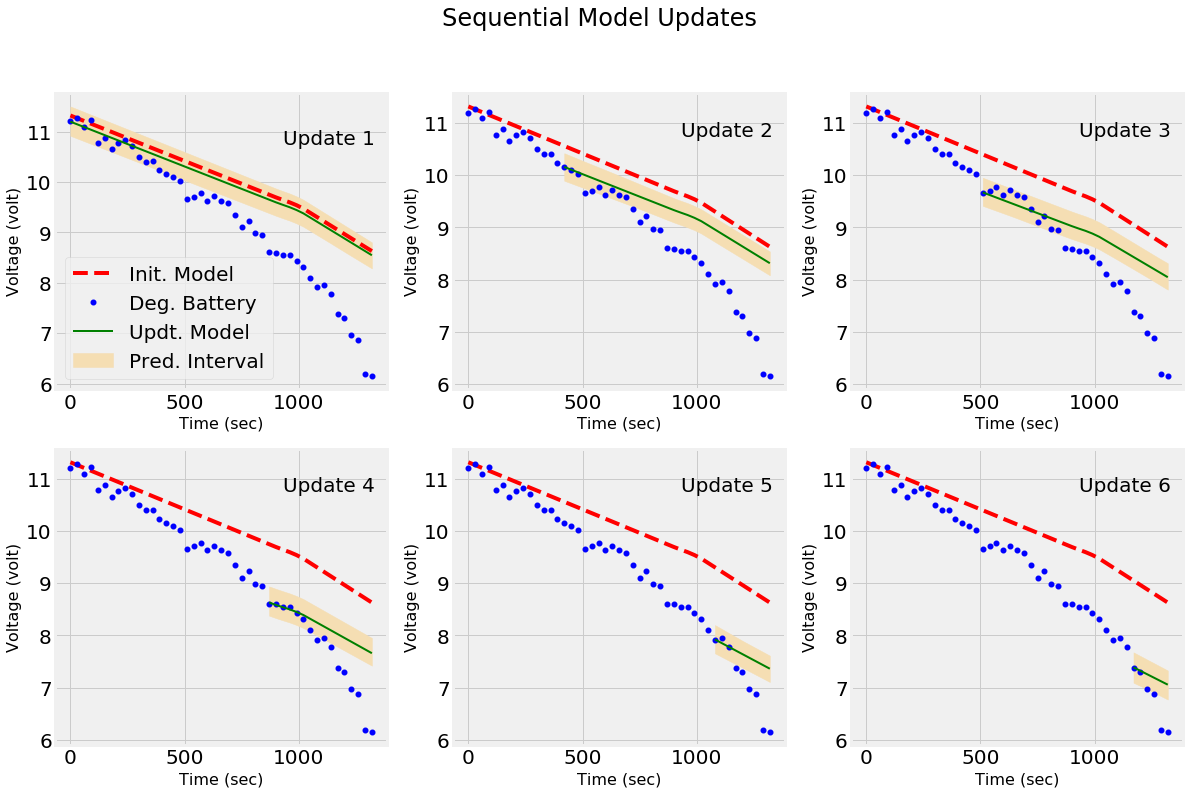

In [26]:
fig, axs = plt.subplots(figsize=(18, 12)) 
fig.suptitle('Sequential Model Updates', fontsize=24)
num_figs = np.min([6, len(update_point_list)-1])
xIndx = time_list[int(num_data*0.7)]
yIndx = 0.95*np.max(voltage_base)
if (num_figs <= 4):
    num_cols = 2
else:
    num_cols = 3       
num_rows = np.ceil(num_figs/num_cols)
for i in np.arange(num_figs):
    low_val = np.array(val_low_list[i])
    high_val = np.array(val_high_list[i])  
    fig_num = num_rows*100 + num_cols*10+ i+1           
    indx = update_point_list[i]-1
    plt.subplot(fig_num)     
    plt.plot(time_list, voltage_base, color='r', linestyle='--')
    plt.plot(time_list, voltage_deg, color='b', linestyle='None', marker='o', ms=4, mew=2)
    plt.plot(med_time_list[i], med_volt_list[i], color='g', linestyle='-', linewidth=2)   
    plt.fill_between(med_time_list[i], low_val, high_val, color='#F5DEB3')
    plt.text(xIndx, yIndx, 'Update ' + str(i+1))
    plt.xlabel('Time (sec)', fontsize=16)
    plt.ylabel('Voltage (volt)', fontsize=16)
    if i==0:      
        plt.legend(('Init. Model', 'Deg. Battery', 'Updt. Model', 'Pred. Interval'))       
plt.savefig('SequentialUpdates.png')  

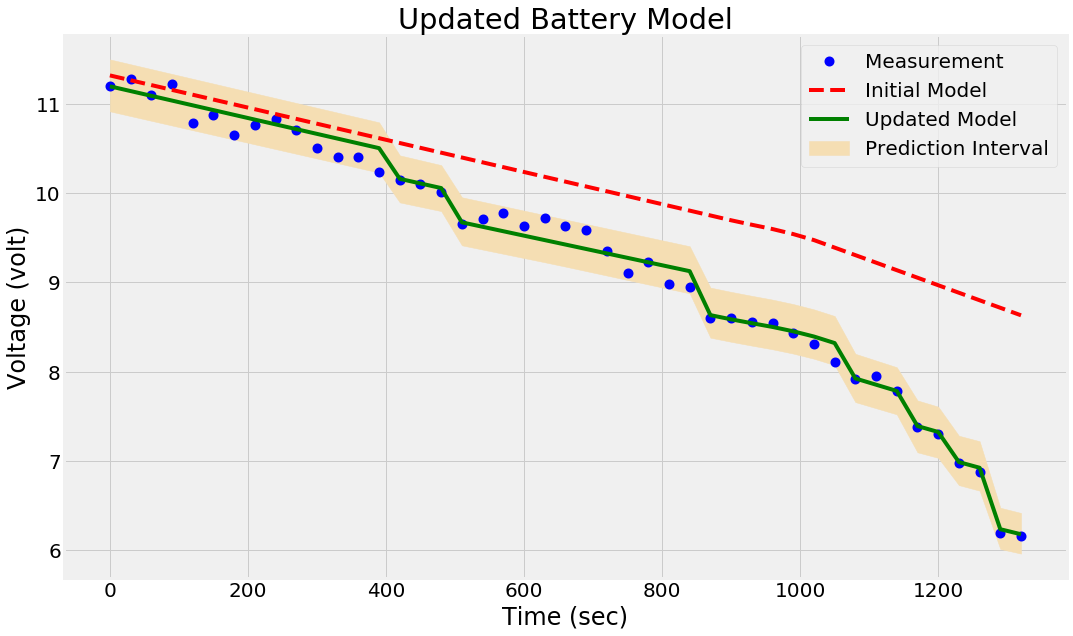

In [31]:
fig, axs = plt.subplots(figsize=(16, 10))
axs.plot(time_list, voltage_deg, color='b', linestyle='None', marker='o', fillstyle='full', ms=6, mew=4)
axs.plot(time_list, voltage_base, color='r', linestyle='--')
axs.plot(time_list, volt_val_init, color='g', linestyle='-')
axs.fill_between(time_list, temp_low, temp_high, color='#F5DEB3')
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Voltage (volt)')
plt.legend(('Measurement', 'Initial Model', 'Updated Model', 'Prediction Interval'))
plt.title('Updated Battery Model')
plt.savefig('UpdatedModelPredVsActual.png')

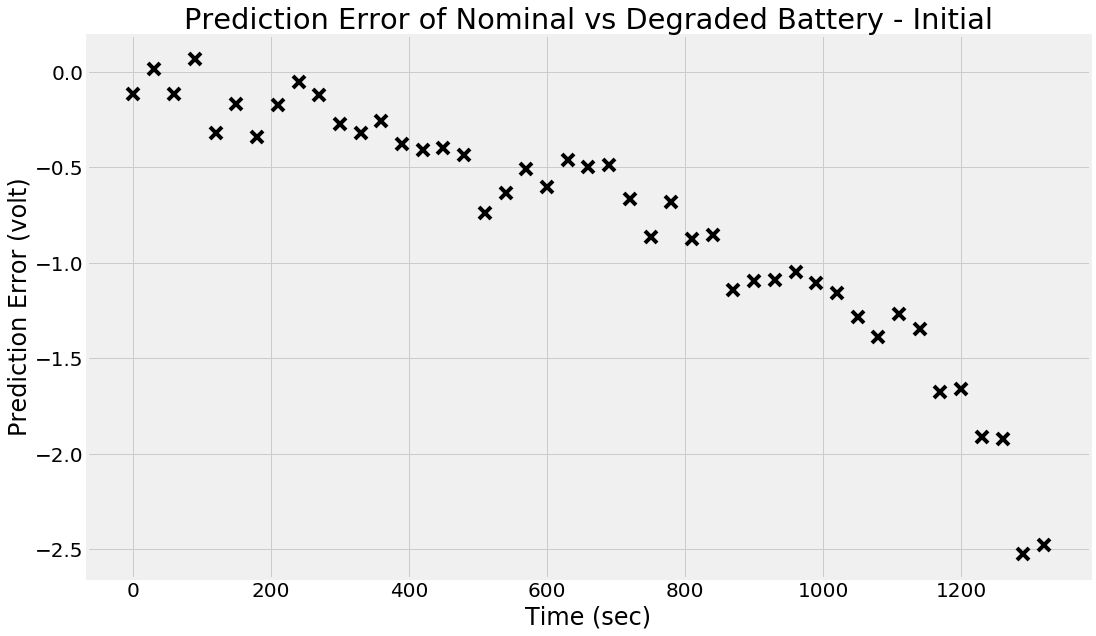

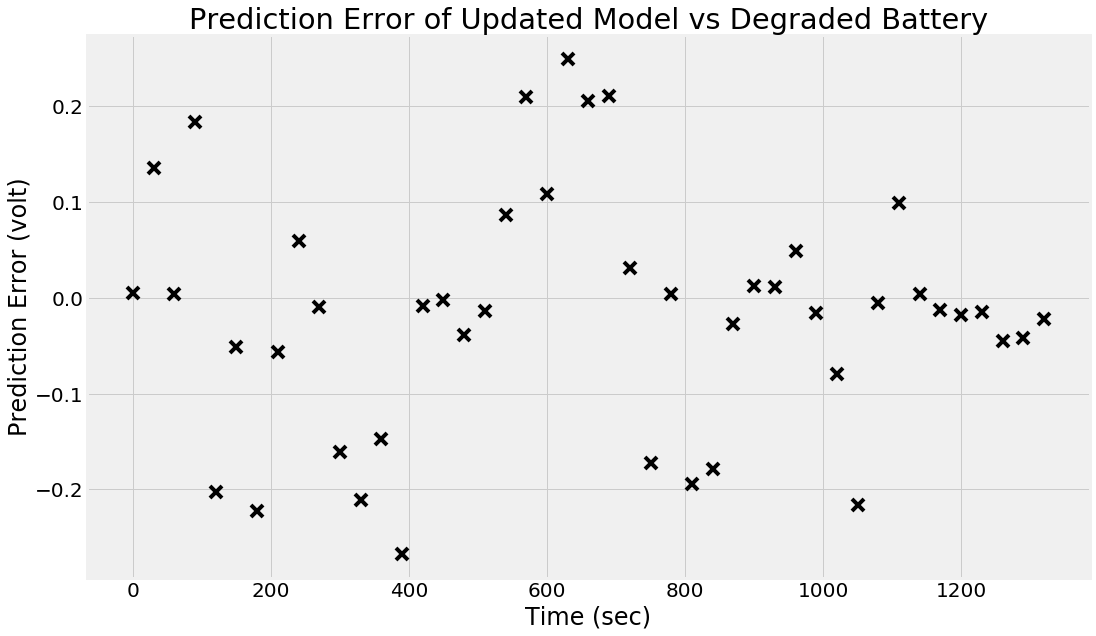

In [28]:
fig, axs = plt.subplots(figsize=(16, 10))  
axs.plot(time_list, np.array(voltage_deg) - np.array(voltage_base), color='k', linestyle='None', marker='x', ms=12, mew=4)
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Prediction Error (volt)')
plt.title('Prediction Error of Nominal vs Degraded Battery - Initial')
plt.savefig('ErrorDegraded_Initial_Trace.png')    
   
fig, axs = plt.subplots(figsize=(16, 10)) 
axs.plot(time_list, np.array(voltage_deg) - np.array(volt_val_init), color='k', linestyle='None', marker='x', ms=12, mew=4)
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Prediction Error (volt)')
plt.title('Prediction Error of Updated Model vs Degraded Battery')
plt.savefig('ErrorUpdated_Trace.png')    

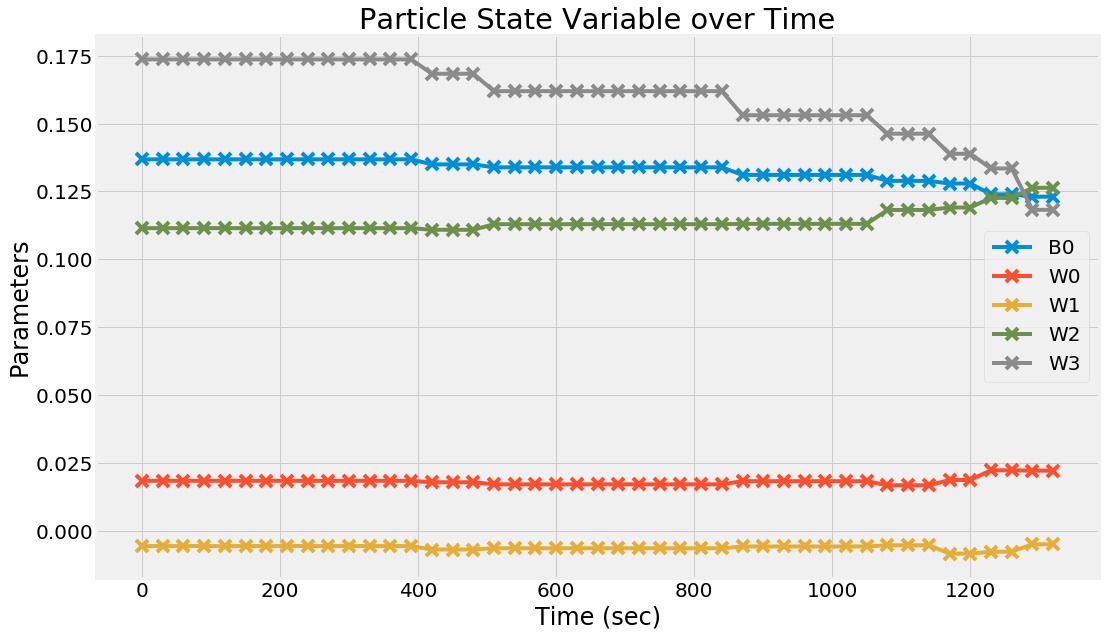

In [29]:
time_vec = np.asarray(time_list) 
fig, axs = plt.subplots(figsize=(16, 10))    
axs.plot(time_vec[0:num_data], x_Mat.transpose()[0:num_data], marker='x', ms=12, mew=4)
plt.legend(('B0', 'W0', 'W1', 'W2', 'W3'))
axs.set_xlabel('Time (sec)')
axs.set_ylabel('Parameters')
plt.title('Particle State Variable over Time')
plt.savefig('PFState_Evolution.png')

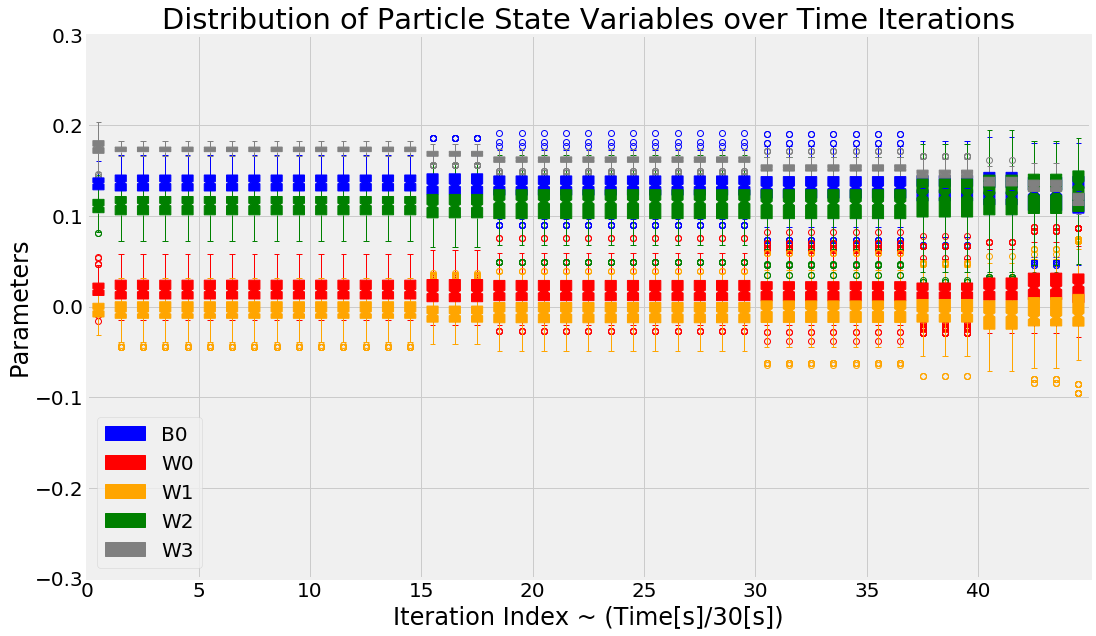

In [30]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(figsize=(16, 10))
color_list = ['blue', 'red', 'orange', 'green', 'gray']
bp_list = []
for idx, color in enumerate(color_list):
    c = color
    loc_bp = axs.boxplot(pf_particles_3d_array[idx,:], notch=True, patch_artist=True,
                    boxprops=dict(facecolor=c, color=c),
                    capprops=dict(color=c),
                    whiskerprops=dict(color=c),
                    flierprops=dict(color=c, markeredgecolor=c),
                    medianprops=dict(color=c))
    bp_list.append(loc_bp)
    #axs.boxplot(pf_particles_3d_array[2,:], notch=True, patch_artist=True)
# Extract the boxes list for rendering the legend with correct color
bp_boxes_list = [a['boxes'][0] for a in bp_list]
plt.legend(bp_boxes_list, ['B0', 'W0', 'W1', 'W2', 'W3'])
axs.set_ylim([-0.3, 0.3])
start, end = axs.get_xlim()
axs.xaxis.set_ticks(np.arange(start, end, 5))
axs.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0d'))
axs.set_xlabel('Iteration Index ~ (Time[s]/%d[s])'%(p_dT))
axs.set_ylabel('Parameters')
plt.title('Distribution of Particle State Variables over Time Iterations')
plt.savefig('PFDistribution_Evolution.png')